In [5]:
%pip install pandas numpy matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import datetime
import time
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [76]:
inputTexts = "./input-data/texts.csv"
chatMessageJoin = "./input-data/chat_message_join.csv"
userOne = "Liz"
userTwo = "Brendan"

In [77]:
import pandas as pd

# Load the CSV files into DataFrames
message_df = pd.read_csv(inputTexts)
chat_message_join_df = pd.read_csv(chatMessageJoin)

# Convert ROWID to integer in message_df
message_df = message_df[message_df['ROWID'].apply(lambda x: x.isnumeric())]
message_df['ROWID'] = message_df['ROWID'].astype(int)

# Perform the equivalent of the SQL JOIN operation
merged_df = pd.merge(message_df, chat_message_join_df,
                     left_on='ROWID', right_on='message_id')

# Select the necessary columns
result_df = merged_df[['ROWID', 'text', 'is_from_me', 'handle_id', 'date']]


# Filter out the null texts
result_df = result_df[result_df['text'].notnull()]
result_df = result_df[result_df['date'].notnull()]

# Coerce date column to numeric
result_df["date"] = pd.to_numeric(result_df["date"], downcast="integer")

# Create a list with the date column to iterate over its elements
m = result_df["date"].tolist()

# Convert current date to seconds and add 31 years
n = [((w/1000000000) + 978307200) for w in m]

# Convert a time expressed in seconds since the Unix epoch to a structured time in UTC
time1 = [time.gmtime(i) for i in n]

# Express the time in local time
timestamp = [time.mktime(o) for o in time1]

# Convert seconds since the Unix epoch to a datetime object that represents local time
dt = [datetime.datetime.fromtimestamp(q) for q in timestamp]

# Convert the output to %Y-%m-%d %H:%M:%S
date = [(s.strftime('%Y-%m-%d %H:%M:%S')) for s in dt]

# Add the new date output to de dataframe
result_df["date_fixed"] = date

# Identify senders
result_df.loc[(result_df['is_from_me'] == 1, "is_from_me")] = userOne
result_df.loc[(result_df['is_from_me'] == 0, "is_from_me")] = userTwo

# Rename column names
result_df = result_df.rename(
    columns={"is_from_me": "sender", "text": "message"})

# Drop unused columns
result_df = result_df.drop(columns=["handle_id", "ROWID", "date"])

/var/folders/dm/l18067jn62qb3fkpng93sqhr0000gn/T/ipykernel_44032/95287159.py:4: DtypeWarning: Columns (10,27,35,43,47,57,63) have mixed types. Specify dtype option on import or set low_memory=False.
  message_df = pd.read_csv(inputTexts)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/var/folders/dm/l18067jn62qb3fkpng93sqhr0000gn/T/ipykernel_44032/95287159.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Liz' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df.loc[(result_df['is_from_me'] == 1, "is_from_me")] = userOne


In [78]:

# Create a column for the number of words in messages
result_df['words'] = result_df['message'].apply(
    lambda x: len(str(x).split(" ")))

# Create another column for the number of characters in messages
result_df['characters'] = result_df['message'].str.len()

# Lowercase for all words
result_df['message'] = result_df['message'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

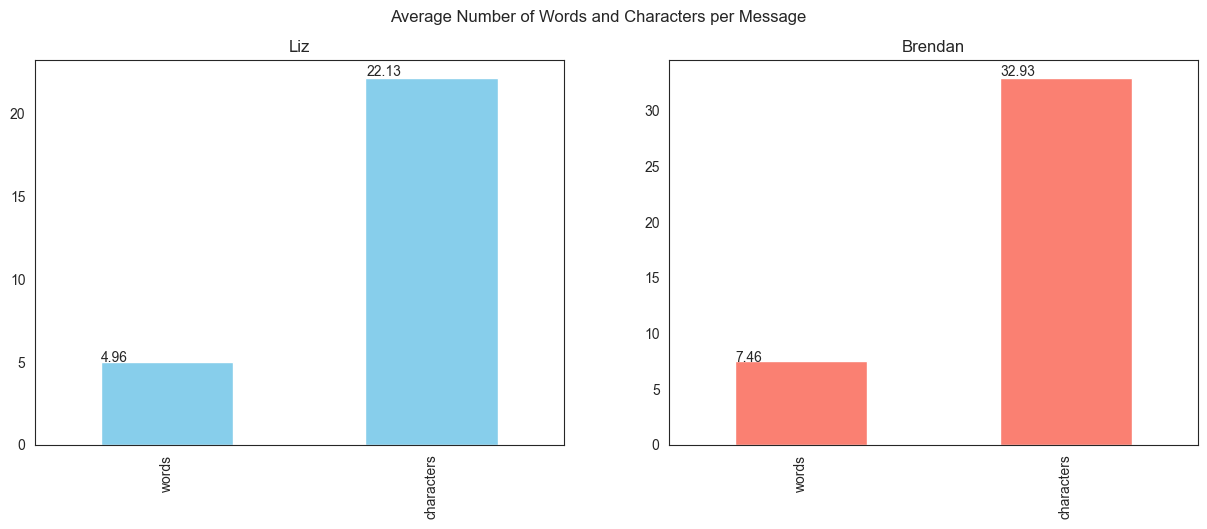

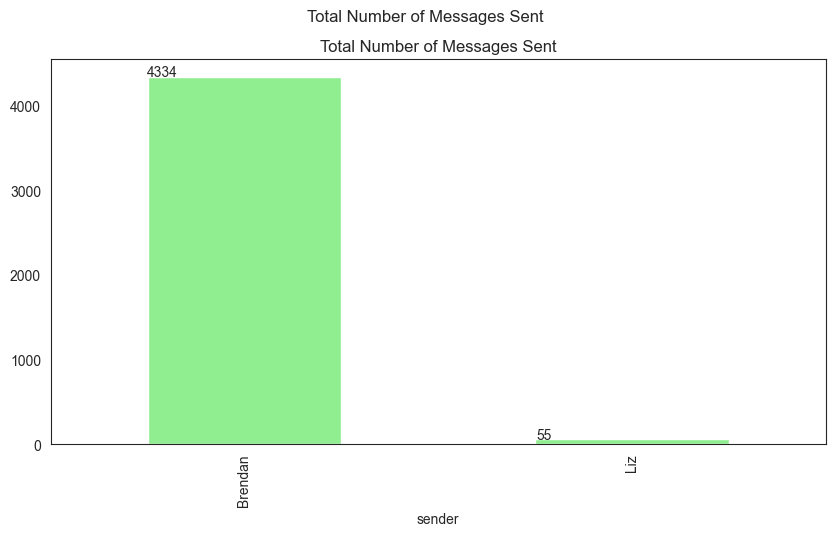

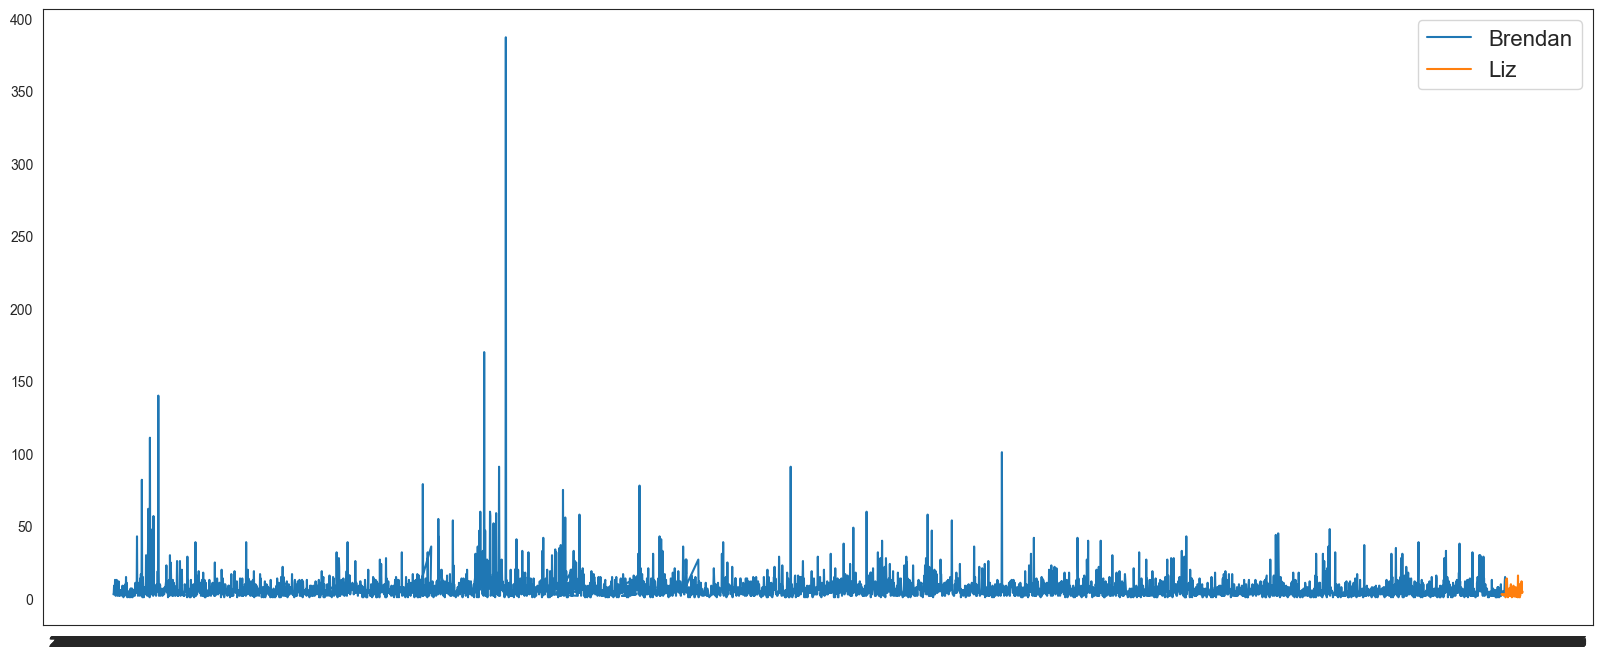

In [79]:
# Average Number of Messages Sent
group = result_df.groupby('sender')
group = group[['words', 'characters']].mean().T

# Plot the average number of words and characters per message
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
group[userOne].plot(kind='bar', ax=ax[0], color='skyblue')
group[userTwo].plot(kind='bar', ax=ax[1], color='salmon')
ax[0].set_title(userOne)
ax[1].set_title(userTwo)
plt.suptitle('Average Number of Words and Characters per Message')
# Add number of words and characters to the bars
for i in ax:
    for p in i.patches:
        i.annotate(str(round(p.get_height(), 2)),
                   (p.get_x() * 1.005, p.get_height() * 1.005))

# Total Number of Messages Sent
group = result_df.groupby('sender')
group = group['message'].count()

# Plot the total number of messages sent
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
group.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_title('Total Number of Messages Sent')
plt.suptitle('Total Number of Messages Sent')
# Add number of messages to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))

# Number of Words Sent Over Time
group = result_df.groupby('sender')
fig, ax = plt.subplots(figsize=(20, 8))
for name, group in group:
    ax.plot(group['date_fixed'], group['words'], label=name)
    ax.legend(loc='best', prop={'size': 16})
plt.show()